In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('tweet_clean.csv')
data

,sentimen,tweet
0,negatif,kata prabowo indonesia harga bangsa asing beri...
1,netral,batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,era jokowi ekonomi indonesia makin baik indone...
3,positif,sumatera selatan asi games dampak pd ekonomi l...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,netral,negarawan sejati sll bangga depan harga diri b...
1811,netral,hrs ceramah damai indonesia ekonomi makin baik...
1812,netral,bangun bangsa dgn dukung ekonomi negara sama p...
1813,netral,bantu maju ekonomi bangsa sama pak jokowi yuk ...


In [3]:
data = data[data['sentimen'] != 'netral']
data


,sentimen,tweet
0,negatif,kata prabowo indonesia harga bangsa asing beri...
3,positif,sumatera selatan asi games dampak pd ekonomi l...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
6,positif,masa tenang msih ngoceh aja ttp jokowi harga mati
7,positif,uasdifitnahkejibalasditps kerjasa ekonomi bila...
...,...,...
1793,negatif,soal kalau pak prabowo jadi presiden dinasti c...
1794,negatif,jokowi is nothing tetap gives nothing ekonomi ...
1795,positif,utk aman negeri maju ekonomi infrastruktur did...
1803,positif,ekonomi indonesia tumbuh bangun infrastruktur ...


In [4]:
data = data[data['sentimen'] != 'netral']
data

,sentimen,tweet
0,negatif,kata prabowo indonesia harga bangsa asing beri...
3,positif,sumatera selatan asi games dampak pd ekonomi l...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
6,positif,masa tenang msih ngoceh aja ttp jokowi harga mati
7,positif,uasdifitnahkejibalasditps kerjasa ekonomi bila...
...,...,...
1793,negatif,soal kalau pak prabowo jadi presiden dinasti c...
1794,negatif,jokowi is nothing tetap gives nothing ekonomi ...
1795,positif,utk aman negeri maju ekonomi infrastruktur did...
1803,positif,ekonomi indonesia tumbuh bangun infrastruktur ...


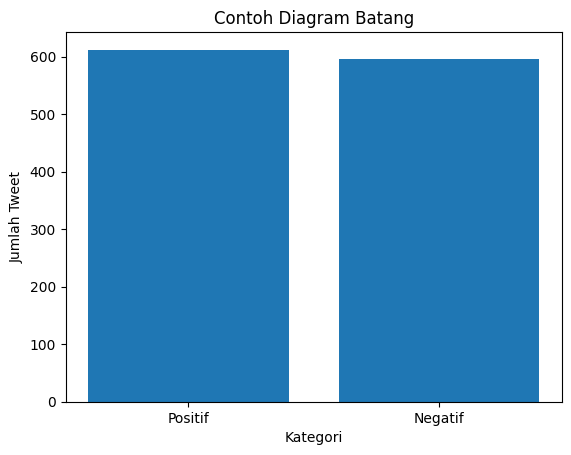

In [5]:
import matplotlib.pyplot as plt

# Data untuk diagram batang
categories = ['Positif', 'Negatif']

# Menghitung jumlah tweet untuk setiap kategori
positif_count = len(data[data['sentimen'] == 'positif'])
# netral_count = len(data[data['sentimen'] == 'netral'])
negatif_count = len(data[data['sentimen'] == 'negatif'])

# Nilai untuk setiap kategori
values = [positif_count,  negatif_count]

# Membuat diagram batang
plt.bar(categories, values)

# Menambahkan judul dan label
plt.title('Contoh Diagram Batang')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tweet')

# Menampilkan diagram
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentimen'])
X = data['tweet'].values

In [7]:
X

array(['kata prabowo indonesia harga bangsa asing berita hoax buat kuasa kan rockygerung twitter com mediaindonesia status s',
       'sumatera selatan asi games dampak pd ekonomi langsung prediksi capai triliun indonesia maju jokowi hebat',
       'negara ngutang buat bngun infrastruktur udah dipake masyarakat terus masyarakat ngeluh negara ngutang tiap negara ngutang utang bayar kalo negara dapet hasil hasil negara pajak',
       ...,
       'utk aman negeri maju ekonomi infrastruktur didik birokrasi maritim hasil arah arah lbh baik lanjut y pak jokowi periode prabowojahap tunggangiislam prabowosakit pic twitter com wjbtinhykl',
       'ekonomi indonesia tumbuh bangun infrastruktur terus laku pak jokowi m detik com finance beritaekonomibisnis d tanpacampurtanganpresidenekonomiribisatumbuhbenarkah',
       'berkat jokowi masa depan tampak suram ekonomi rakyat indonesia jokowimediaoligarki'],
      dtype=object)

In [8]:
# Setelah itu, fit_transform
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=2000, ngram_range=(1, 3), use_idf=True)
X = tv.fit_transform(data['tweet']).toarray()


In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((966, 2000), (242, 2000), (966,), (242,))

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# Perhitungan metrik untuk multi-class
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # atau 'weighted'
recall = recall_score(y_test, y_pred, average='macro')        # atau 'weighted'
f1 = f1_score(y_test, y_pred, average='macro')                # atau 'weighted'

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7521
Precision: 0.7562
Recall: 0.7562
F1 Score: 0.7521
Confusion Matrix:
[[91 21]
 [39 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       112
           1       0.81      0.70      0.75       130

    accuracy                           0.75       242
   macro avg       0.76      0.76      0.75       242
weighted avg       0.76      0.75      0.75       242



In [15]:
# Menggunakan SVM untuk klasifikasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
# Melakukan prediksi menggunakan SVM
svm_y_pred = svm_model.predict(X_test)

# Perhitungan metrik untuk multi-class
accuracy = accuracy_score(y_test, svm_y_pred)
precision = precision_score(y_test, svm_y_pred, average='macro')  # atau 'weighted'
recall = recall_score(y_test, svm_y_pred, average='macro')        # atau 'weighted'
f1 = f1_score(y_test, svm_y_pred, average='macro')                # atau 'weighted'

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, svm_y_pred))


Accuracy: 0.7273
Precision: 0.7302
Recall: 0.7307
F1 Score: 0.7273
Confusion Matrix:
[[87 25]
 [41 89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.72       112
           1       0.78      0.68      0.73       130

    accuracy                           0.73       242
   macro avg       0.73      0.73      0.73       242
weighted avg       0.73      0.73      0.73       242

